In [100]:
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
data= pd.read_csv("C:\\Users\\Dell\\Downloads\\diabetes.csv")

In [204]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [205]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [206]:
RANDOM_SEED=42

In [207]:
not_diabetic= data[data['Outcome']== 0]
diabetic= data[data['Outcome']== 1]

0    500
1    268
Name: Outcome, dtype: int64


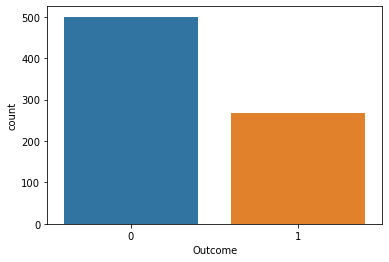

In [208]:
import seaborn as sns
sns.countplot(x='Outcome',data=data)
num=df['Outcome'].value_counts()
print(num)

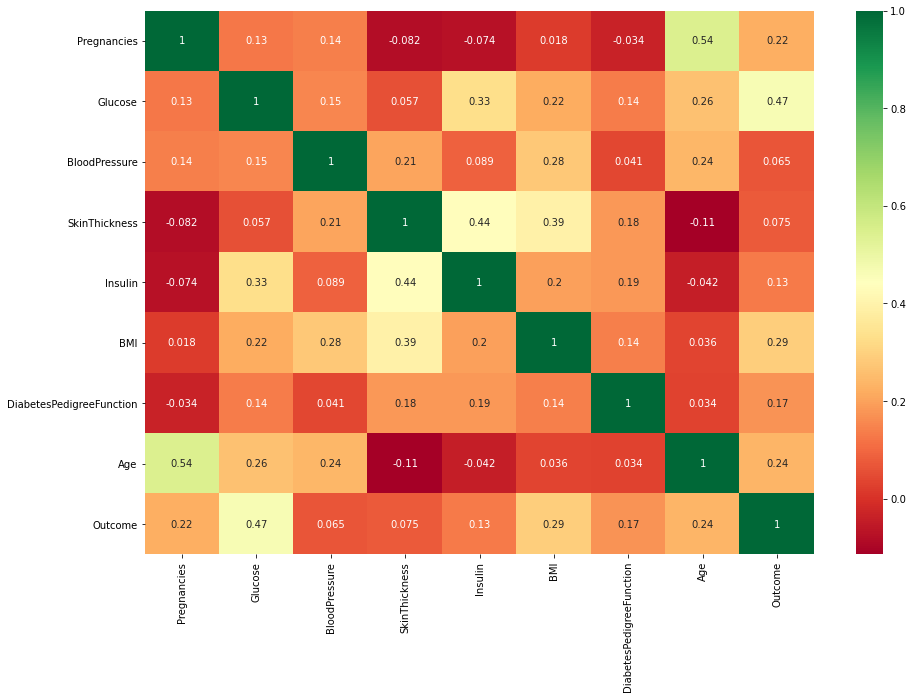

In [209]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

# Data Processing

In [221]:
df=data.drop(["SkinThickness"],axis=1)
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [222]:
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)

In [225]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [226]:
y_pred=nb.predict(x_test)

In [227]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7360594795539034


In [280]:

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn_scores=[]

neighbors=np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i,k in enumerate(neighbors):
    classifier =  KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    train_accuracy[i]=classifier.score(x_train,y_train)
    test_accuracy[i]=classifier.score(x_test,y_test)
    

Text(0, 0.5, 'Knn scores')

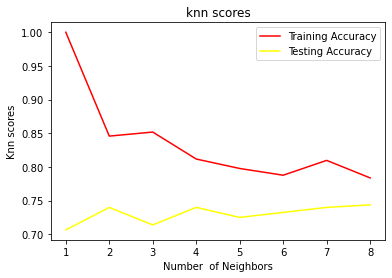

In [281]:
plt.title('knn scores')
plt.plot(neighbors,train_accuracy,color='red',label="Training Accuracy")
plt.plot(neighbors, test_accuracy,color='yellow',label='Testing Accuracy')
plt.legend()
plt.xlabel("Number  of Neighbors")
plt.ylabel("Knn scores")

# We can observe that we get maximum test accuracy for k=8

In [282]:

classifier =  KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7434944237918215


In [230]:
from sklearn.ensemble import RandomForestClassifier

In [284]:
clf = RandomForestClassifier(n_estimators = 200) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7695167286245354


In [285]:
# prediction

x_new= [[2,100,61,29,126,0.354,32]]

#naive_bayes
naive_bayes=nb.predict(x_new)

#Decision Tree
knn=classifier.predict(x_new)

#RandomClassifier
r_c= clf.predict(x_new)

if(naive_bayes==0):
    print('Naive Bayes predicts patient is not diabetic')
else:
     print('Naive Bayes predicts patient is diabetic')
        
if(knn==0):
    print('KNN predicts patient is not diabetic')
else:
    print('KNN predicts patient is diabetic')
    
if(r_c==0):
    print('Random Forest Classifier predicts patient is not diabetic')
else:
    print('Random Forest Classifier predicts patient is diabetic')

Naive Bayes predicts patient is diabetic
KNN predicts patient is not diabetic
Random Forest Classifier predicts patient is not diabetic


# Out of three, two models has predicted that the patient is not diabetic. Final result will be not diabetic. 